In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from preprocessing import month_to_datestring

# Standard Library
import itertools
import warnings
from datetime import datetime, timedelta

# Numerical Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
%matplotlib inline

# Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [51]:
from preprocessing import convert_month_to_date

df = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df = convert_month_to_date(df)
df = df[df.countryname == "Country A"]
df = df.asfreq('M')
#columns_to_keep = ['sales_actuals_monthly__vehiclegroup01__orderintake']
#df = df[columns_to_keep]
df['Date'] = df.index
df = df.iloc[:-103]
target_col = "sales_actuals_monthly__vehiclegroup01__orderintake"
# Convert the column values to integers
df[target_col] = df[target_col].astype(int)

<AxesSubplot: xlabel='date'>

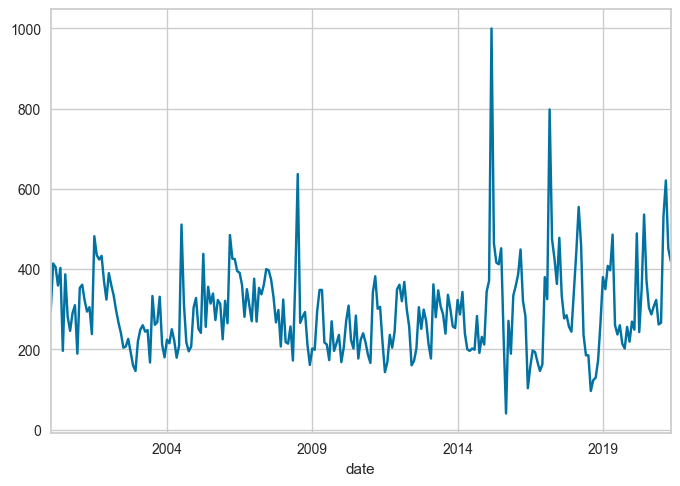

In [52]:
df.sales_actuals_monthly__vehiclegroup01__orderintake.plot()

Ad_test

In [53]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['sales_actuals_monthly__vehiclegroup01__orderintake'])

1. ADF :  -7.173141069498126
2. P-Value :  2.770905834856395e-10
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 252
5. Critical Values :
	 1% :  -3.4565688966099373
	 5% :  -2.8730786194395455
	 10% :  -2.5729189953388762


In [54]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['sales_actuals_monthly__vehiclegroup01__orderintake'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3082.722, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3146.439, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3079.794, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3099.618, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3688.094, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3079.579, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3080.597, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3081.400, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3080.563, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3082.541, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3125.660, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.458 seconds


In [55]:
stepwise_fit = auto_arima(df['sales_actuals_monthly__vehiclegroup01__orderintake'], 
                           trace=True,
                           suppress_warnings=True,
                           d=2,  # Increase if necessary
                           max_p=5,  # Increase if necessary
                           max_q=5)  # Increase if necessary


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3377.425, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3255.706, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3213.706, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3183.717, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3177.798, Time=0.02 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3171.401, Time=0.03 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3173.402, Time=0.04 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 0.630 seconds


In [56]:
stepwise_fit = auto_arima(df['sales_actuals_monthly__vehiclegroup01__orderintake'], 
                           trace=True,
                           suppress_warnings=True,
                           seasonal=True,
                           m=12)  # Adjust based on your seasonal period


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3064.295, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3146.439, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3066.506, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3091.730, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3688.094, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3076.020, Time=0.35 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3048.049, Time=1.98 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=3058.422, Time=1.60 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=3043.746, Time=2.04 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=3

In [57]:
print(df.shape)
train=df.iloc[:-18]
test=df.iloc[-18:]
print(train.shape,test.shape)

(257, 2369)
(239, 2369) (18, 2369)


In [58]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['sales_actuals_monthly__vehiclegroup01__orderintake'],order=(3,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                               SARIMAX Results                                                
==============================================================================================================
Dep. Variable:     sales_actuals_monthly__vehiclegroup01__orderintake   No. Observations:                  239
Model:                                                 ARIMA(3, 0, 1)   Log Likelihood               -1421.271
Date:                                                Wed, 31 Jan 2024   AIC                           2854.542
Time:                                                        12:33:50   BIC                           2875.400
Sample:                                                    01-31-2000   HQIC                          2862.947
                                                         - 11-30-2019                                         
Covariance Type:                                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        290.3634     12.371     23.471      0.000     266.116     314.611
ar.L1          1.0543      0.320      3.300      0.001       0.428       1.681
ar.L2         -0.1130      0.175     -0.645      0.519      -0.456       0.230
ar.L3         -0.1744      0.069     -2.533      0.011      -0.309      -0.039
ma.L1         -0.6247      0.324     -1.929      0.054      -1.260       0.010
sigma2      8553.5194    459.139     18.629      0.000    7653.623    9453.416
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1589.71
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.42   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='date'>

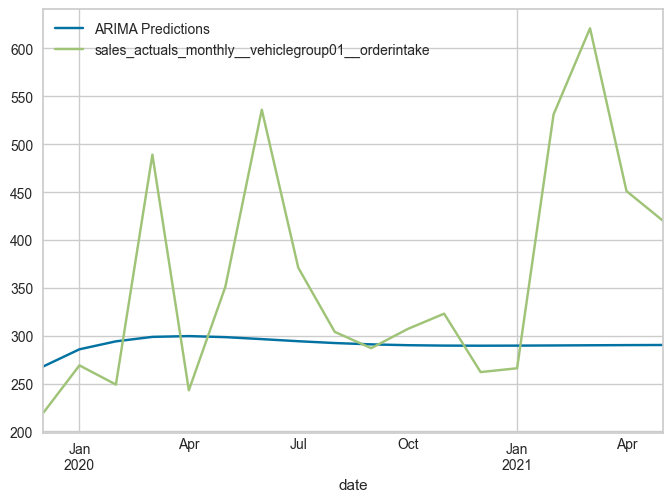

In [59]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['sales_actuals_monthly__vehiclegroup01__orderintake'].plot(legend=True)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
test['sales_actuals_monthly__vehiclegroup01__orderintake'].mean()
rmse=sqrt(mean_squared_error(pred,test['sales_actuals_monthly__vehiclegroup01__orderintake']))
mape = mean_absolute_percentage_error(pred,test['sales_actuals_monthly__vehiclegroup01__orderintake'])
print(mape)
print(rmse)

0.3246138602418321
134.0427812393369


### SARMIAX

In [50]:
df['sales_actuals_monthly__vehiclegroup01__orderintake']
df = df.asfreq('M')
df

,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,Date
date,,,,,,,,,,,,,,,,,,,,,
2000-01,Country A,296,352.0,739.0,471.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01
2000-02,Country A,414,372.0,904.0,528.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02
2000-03,Country A,405,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-03
2000-04,Country A,359,483.0,828.0,972.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-04
2000-05,Country A,403,474.0,594.0,900.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01,Country A,266,195.0,306.0,62.0,296.0,210.0,184.0,142.0,306.0,...,27434.0,3349.0,2606.0,9495.0,45755.0,2220.0,1329.0,1380.0,31132.0,2021-01
2021-02,Country A,531,247.0,302.0,136.0,383.0,305.0,199.0,233.0,389.0,...,34821.0,3072.0,3442.0,12235.0,54097.0,2496.0,1525.0,1421.0,32757.0,2021-02
2021-03,Country A,621,553.0,365.0,237.0,492.0,469.0,303.0,375.0,456.0,...,51828.0,4212.0,7549.0,16904.0,79337.0,4193.0,1906.0,2493.0,44641.0,2021-03


Check for seasonality

date
2000-01-01    1.039325
2000-02-01    1.017440
2000-03-01    1.383955
2000-04-01    1.151238
2000-05-01    1.047215
                ...   
2021-01-01    1.039325
2021-02-01    1.017440
2021-03-01    1.383955
2021-04-01    1.151238
2021-05-01    1.047215
Freq: MS, Name: seasonal, Length: 257, dtype: float64

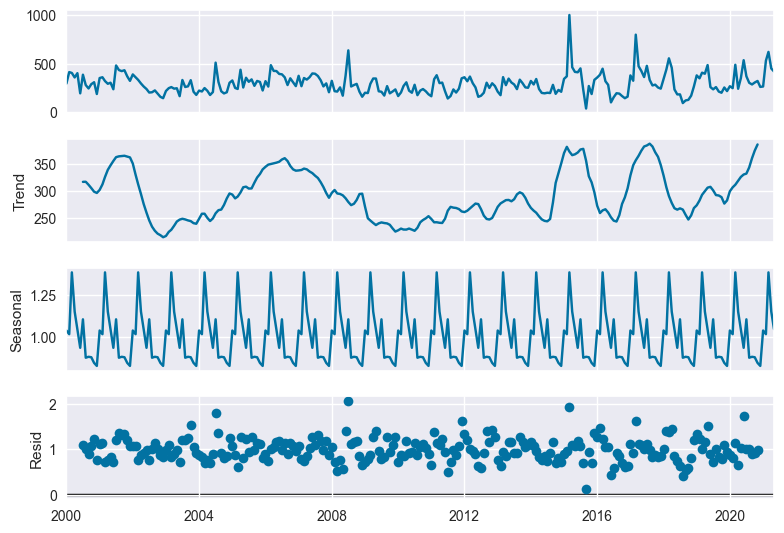

In [396]:
from statsmodels.tsa.seasonal import seasonal_decompose
analysis = df[['sales_actuals_monthly__vehiclegroup01__orderintake']].copy()
analysis.index=analysis.index.to_timestamp()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();
seasonal

### IDENTIFYING HIGHLY CORRELATED COLUMNS

In [73]:
## Fill missing values
df.fillna(df.mean(), inplace=True)
#Filter Numeric Columns Only
df = df.select_dtypes(include='number')
pearson_corr = df.corr()
pearson_corr

,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,sales_actuals_monthly__vehiclegroup05__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
sales_actuals_monthly__vehiclegroup01__orderintake,1.000000,0.364422,0.215557,0.247682,-0.012594,0.027542,0.321568,0.262040,0.161847,0.137323,...,0.034929,0.087153,-0.084725,0.151161,0.022203,-0.015343,0.030095,0.132359,0.046331,-0.015798
sales_actuals_monthly__vehiclegroup01__retail,0.364422,1.000000,0.356640,0.605002,-0.123562,0.302904,0.217586,0.543795,-0.108917,0.295368,...,0.099498,0.125362,0.016437,0.185282,0.066282,0.072691,0.060084,0.093655,0.097484,0.055055
sales_actuals_monthly__vehiclegroup02__orderintake,0.215557,0.356640,1.000000,0.689429,0.012047,0.187125,0.281551,0.198356,0.029357,0.110319,...,0.037617,0.033148,-0.017944,0.021282,0.027188,0.021830,0.038586,0.007691,0.025960,0.015115
sales_actuals_monthly__vehiclegroup02__retail,0.247682,0.605002,0.689429,1.000000,-0.080382,0.224084,0.123545,0.338989,0.034405,0.163061,...,0.047804,0.058646,0.030031,0.078012,0.048319,0.039902,0.017480,0.032400,0.071755,0.040479
sales_actuals_monthly__vehiclegroup03__orderintake,-0.012594,-0.123562,0.012047,-0.080382,1.000000,0.331209,-0.137106,-0.237481,0.073856,0.130289,...,0.110156,0.119696,0.057364,0.051642,0.098409,0.113989,0.129835,0.010635,0.106107,0.092077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
registrations__buildtype_kurzheck,-0.015343,0.072691,0.021830,0.039902,0.113989,0.129309,0.063079,0.091281,0.082767,0.288330,...,0.946832,0.856981,0.710956,0.383311,0.939132,1.000000,0.869505,0.007937,0.803385,0.874757
registrations__buildtype_other,0.030095,0.060084,0.038586,0.017480,0.129835,0.114720,0.053836,0.037046,0.055204,0.224013,...,0.827085,0.766770,0.399042,0.374026,0.773344,0.869505,1.000000,-0.076716,0.634260,0.653026
registrations__buildtype_pickup,0.132359,0.093655,0.007691,0.032400,0.010635,0.067442,0.015192,0.075163,0.063132,0.033249,...,0.204249,0.241581,0.183216,0.450382,0.213726,0.007937,-0.076716,1.000000,0.251696,0.286533
registrations__buildtype_coupe,0.046331,0.097484,0.025960,0.071755,0.106107,0.103109,0.071416,0.135414,0.085730,0.137437,...,0.834502,0.888963,0.667809,0.694356,0.830076,0.803385,0.634260,0.251696,1.000000,0.783666


In [75]:
filtered_corr = pearson_corr[abs(pearson_corr) > 0.3]
filtered_corr

,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,sales_actuals_monthly__vehiclegroup05__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
sales_actuals_monthly__vehiclegroup01__orderintake,1.000000,0.364422,NaN,NaN,NaN,NaN,0.321568,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup01__retail,0.364422,1.000000,0.356640,0.605002,NaN,0.302904,NaN,0.543795,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup02__orderintake,NaN,0.356640,1.000000,0.689429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup02__retail,NaN,0.605002,0.689429,1.000000,NaN,NaN,NaN,0.338989,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup03__orderintake,NaN,NaN,NaN,NaN,1.0,0.331209,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
registrations__buildtype_kurzheck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.946832,0.856981,0.710956,0.383311,0.939132,1.000000,0.869505,NaN,0.803385,0.874757
registrations__buildtype_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.827085,0.766770,0.399042,0.374026,0.773344,0.869505,1.000000,NaN,0.634260,0.653026
registrations__buildtype_pickup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.450382,NaN,NaN,NaN,1.0,NaN,NaN
registrations__buildtype_coupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.834502,0.888963,0.667809,0.694356,0.830076,0.803385,0.634260,NaN,1.000000,0.783666


In [123]:
# Replace 'sales_actuals_monthly__vehiclegroup01__orderintake' with your actual column name
target_column = 'sales_actuals_monthly__vehiclegroup01__orderintake'

# Get the absolute correlation values for the target column and sort them in descending order
abs_corr_values_target = pearson_corr.abs()[target_column].sort_values(ascending=False)

# Extract the top 10 values along with their column names
top_10_corr_values_target = abs_corr_values_target[1:15]  # Exclude the target column itself

# Extract the corresponding column names
top_10_corr_column_names_target = top_10_corr_values_target.index

# Display the result
print(f"Top 10 values correlated with '{target_column}':")
print(top_10_corr_values_target)
print("\nCorresponding column names:")
print(top_10_corr_column_names_target)

Top 10 values correlated with 'sales_actuals_monthly__vehiclegroup01__orderintake':
sales_actuals_monthly__vehiclegroup36__orderintake             0.678821
sales_actuals_monthly__vehiclegroup14__orderintake             0.678821
customer_vehicle_relationships__vehiclegroup14__active_cars    0.569102
customer_vehicle_relationships__vehiclegroup36__active_cars    0.569102
sales_actuals_monthly__vehiclegroup15__orderintake             0.559462
customer_vehicle_relationships__vehiclegroup01__active_cars    0.427069
sales_actuals_monthly__vehiclegroup15__retail                  0.424702
sales_actuals_monthly__vehiclegroup35__orderintake             0.406665
premises__vehiclegroup14__flag_order_start                     0.404157
premises__vehiclegroup36__flag_order_start                     0.404157
sales_actuals_monthly__vehiclegroup16__orderintake             0.377727
sales_actuals_monthly__vehiclegroup38__orderintake             0.377727
sales_actuals_monthly__vehiclegroup01__retail       

In [124]:
top_10_columns = top_10_corr_column_names_target.tolist()  # Convert the index to a list of column names

# Filter the train DataFrame to include only the top 10 correlated columns and the target column
exog_train = train[top_10_columns]
exog_train

,sales_actuals_monthly__vehiclegroup36__orderintake,sales_actuals_monthly__vehiclegroup14__orderintake,customer_vehicle_relationships__vehiclegroup14__active_cars,customer_vehicle_relationships__vehiclegroup36__active_cars,sales_actuals_monthly__vehiclegroup15__orderintake,customer_vehicle_relationships__vehiclegroup01__active_cars,sales_actuals_monthly__vehiclegroup15__retail,sales_actuals_monthly__vehiclegroup35__orderintake,premises__vehiclegroup14__flag_order_start,premises__vehiclegroup36__flag_order_start,sales_actuals_monthly__vehiclegroup16__orderintake,sales_actuals_monthly__vehiclegroup38__orderintake,sales_actuals_monthly__vehiclegroup01__retail,leads__vehiclegroup01__won
date,,,,,,,,,,,,,,
2000-01,5.0,5.0,2.0,2.0,1.000000,25.0,1.000000,240.787234,21.028037,21.028037,226.000000,226.000000,352.0,323.572864
2000-02,20.0,20.0,5.0,5.0,333.959839,102.0,332.317797,240.787234,21.028037,21.028037,284.000000,284.000000,372.0,323.572864
2000-03,12.0,12.0,16.0,16.0,333.959839,152.0,332.317797,240.787234,21.028037,21.028037,185.000000,185.000000,604.0,323.572864
2000-04,7.0,7.0,9.0,9.0,333.959839,75.0,332.317797,240.787234,21.028037,21.028037,165.000000,165.000000,483.0,323.572864
2000-05,19.0,19.0,14.0,14.0,333.959839,91.0,332.317797,240.787234,21.028037,21.028037,183.000000,183.000000,474.0,323.572864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07,76.0,76.0,253.0,253.0,451.000000,736.0,882.000000,96.000000,0.000000,0.000000,118.398374,118.398374,506.0,567.000000
2019-08,32.0,32.0,216.0,216.0,362.000000,635.0,630.000000,101.000000,0.000000,0.000000,2.000000,2.000000,502.0,540.000000
2019-09,1.0,1.0,127.0,127.0,330.000000,597.0,643.000000,22.000000,0.000000,0.000000,4.000000,4.000000,510.0,482.000000


In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(train['sales_actuals_monthly__vehiclegroup01__orderintake'],order=(3,0,1), exog=exog_train)

In [126]:
model=sarimax_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13442D+00    |proj g|=  6.68731D-01

At iterate    5    f=  5.04626D+00    |proj g|=  1.24749D-01

At iterate   10    f=  5.02190D+00    |proj g|=  2.38384D-02

At iterate   15    f=  5.02032D+00    |proj g|=  8.53004D-03

At iterate   20    f=  5.02012D+00    |proj g|=  8.90776D-03


 This problem is unconstrained.



At iterate   25    f=  5.01930D+00    |proj g|=  6.86394D-02
At iterate   30    f=  5.01130D+00    |proj g|=  1.18321D-01

At iterate   35    f=  4.99783D+00    |proj g|=  6.55037D-02

At iterate   40    f=  4.99189D+00    |proj g|=  4.52981D-02

At iterate   45    f=  4.98902D+00    |proj g|=  1.47282D-02

At iterate   50    f=  4.98871D+00    |proj g|=  1.18942D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     50     55      1     0     0   1.189D-02   4.989D+00
  F =   4.9887075613981793     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [127]:
start=len(train)
end=len(train)+len(test)-1
exog_test = test[top_10_columns]
pred=model.predict(start=start,end=end,typ='levels',exog=exog_test).rename('SARIMAX Predictions')


<AxesSubplot: xlabel='date'>

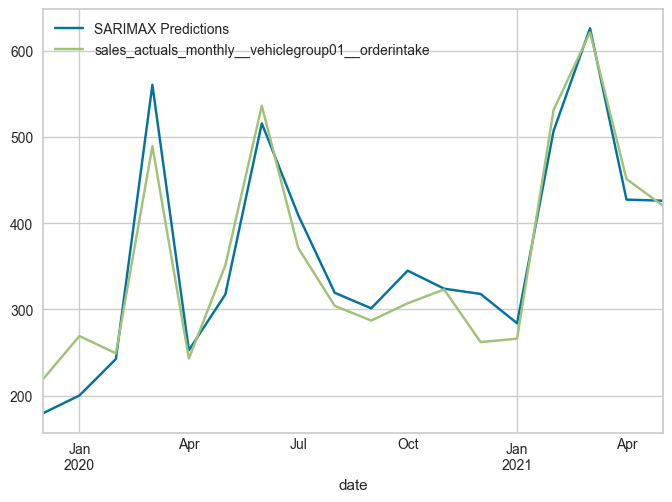

In [128]:
pred.plot(legend=True)
test['sales_actuals_monthly__vehiclegroup01__orderintake'].plot(legend=True)

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
test['sales_actuals_monthly__vehiclegroup01__orderintake'].mean()
rmse=sqrt(mean_squared_error(pred,test['sales_actuals_monthly__vehiclegroup01__orderintake']))
mape = mean_absolute_percentage_error(pred,test['sales_actuals_monthly__vehiclegroup01__orderintake'])
print(mape)
print(rmse)

0.21727468989600482
115.2508475165202


In [122]:
top_10_columns

['sales_actuals_monthly__vehiclegroup36__orderintake',
 'sales_actuals_monthly__vehiclegroup14__orderintake',
 'customer_vehicle_relationships__vehiclegroup14__active_cars',
 'customer_vehicle_relationships__vehiclegroup36__active_cars',
 'sales_actuals_monthly__vehiclegroup15__orderintake',
 'customer_vehicle_relationships__vehiclegroup01__active_cars',
 'sales_actuals_monthly__vehiclegroup15__retail',
 'sales_actuals_monthly__vehiclegroup35__orderintake',
 'premises__vehiclegroup14__flag_order_start',
 'premises__vehiclegroup36__flag_order_start',
 'sales_actuals_monthly__vehiclegroup16__orderintake',
 'sales_actuals_monthly__vehiclegroup38__orderintake',
 'sales_actuals_monthly__vehiclegroup01__retail',
 'leads__vehiclegroup01__won',
 'leasing_contracts__vehiclegroup23__end',
 'sales_actuals_monthly__vehiclegroup37__orderintake',
 'customer_vehicle_relationships__vehiclegroup35__active_cars',
 'sales_actuals_monthly__vehiclegroup34__orderintake',
 'sales_actuals_monthly__vehiclegrou

In [131]:
abs_corr_values_target = pearson_corr.abs()[target_column].sort_values(ascending=False)


Index(['sales_actuals_monthly__vehiclegroup01__orderintake',
       'sales_actuals_monthly__vehiclegroup36__orderintake',
       'sales_actuals_monthly__vehiclegroup14__orderintake',
       'customer_vehicle_relationships__vehiclegroup14__active_cars',
       'customer_vehicle_relationships__vehiclegroup36__active_cars',
       'sales_actuals_monthly__vehiclegroup15__orderintake',
       'customer_vehicle_relationships__vehiclegroup01__active_cars',
       'sales_actuals_monthly__vehiclegroup15__retail',
       'sales_actuals_monthly__vehiclegroup35__orderintake',
       'premises__vehiclegroup14__flag_order_start',
       ...
       'global_economy__unspecified_revenue_total_otherwise_current_in_lcu_unspecified_government__u_s_dollar',
       'global_economy__unspecified_revenue_total_otherwise_current_in_us_central_government__u_s_dollar',
       'global_economy__unspecified_revenue_total_otherwise_current_of_gdp_central_government__percentage',
       'global_economy__user_cost_of_c

## Check which of the highly correlated cols can be used as exog.var

abs_corr_values_target = pearson_corr.abs()[target_column].sort_values(ascending=False)

In [139]:
df_v2 = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df_v2 = convert_month_to_date(df_v2)
df_v2 = df_v2[df_v2.countryname == "Country A"]
df_v2 = df_v2.asfreq('M')
#columns_to_keep = ['sales_actuals_monthly__vehiclegroup01__orderintake']
#df = df[columns_to_keep]
df_v2['Date'] = df_v2.index
df_v2 = df_v2.iloc[257:]
df_v2 = df_v2.iloc[:-85]
df_v2


,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,Date
date,,,,,,,,,,,,,,,,,,,,,
2021-06,Country A,544.0,475.0,185.0,294.0,377.0,525.0,206.0,336.0,163.0,...,46702.0,4329.0,7057.0,15989.0,76459.0,4217.0,2030.0,2095.0,38625.0,2021-06
2021-07,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07
2021-08,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08
2021-09,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09
2021-10,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10
2021-11,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11
2021-12,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12
2022-01,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01
2022-02,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02


In [140]:
df_v2
## Fill missing values
df_v2.fillna(df.mean(), inplace=True)
df_v2

,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,Date
date,,,,,,,,,,,,,,,,,,,,,
2021-06,Country A,544.000000,475.000000,185.000000,294.000000,377.00000,525.000000,206.000000,336.000000,163.000000,...,46702.000000,4329.000000,7057.000000,15989.000000,76459.000000,4217.000000,2030.000000,2095.000000,38625.000000,2021-06
2021-07,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-07
2021-08,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-08
2021-09,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-09
2021-10,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-10
2021-11,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-11
2021-12,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2021-12
2022-01,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2022-01
2022-02,Country A,295.361868,376.416342,318.385214,269.789883,419.45815,457.022523,294.115183,292.784946,424.318681,...,40568.352941,5049.352941,4819.647059,13358.235294,67099.176471,3042.294118,1565.529412,2001.176471,40168.705882,2022-02


In [262]:
def get_high_corr_cols (limit):
    df_v2 = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
    df_v2 = convert_month_to_date(df_v2)
    df_v2 = df_v2[df_v2.countryname == "Country A"]
    df_v2 = df_v2.asfreq('M')
    #columns_to_keep = ['sales_actuals_monthly__vehiclegroup01__orderintake']
    #df = df[columns_to_keep]
    df_v2['Date'] = df_v2.index
    df_v2 = df_v2.iloc[257:]
    df_v2 = df_v2.iloc[:-85]
    df_cleaned = df_v2.dropna(axis=1)
    abs_corr_values_target = pearson_corr.abs()[target_column].sort_values(ascending=False)


    # Extract the top 10 values along with their column names
    top_100_corr_values_target = abs_corr_values_target[1:100]  # Exclude the target column itself
    # Extract the corresponding column names
    top_10_corr_column_names_target = top_100_corr_values_target.index
    
    top_100_corr_values_target = abs_corr_values_target[1:100]
    top_100_columns = top_10_corr_column_names_target.tolist()
    df_filtered = df_v2[top_100_columns]
    df_filtered_cleaned = df_filtered.dropna(axis=1)
    column_names_array = df_filtered_cleaned.columns.to_list()
    return column_names_array
    

In [247]:
df_cleaned = df_v2.dropna(axis=1)

In [248]:
df_cleaned

,countryname,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,leasing_contracts__vehiclegroup02__end,leasing_contracts__vehiclegroup02__start,leasing_contracts__vehiclegroup03__end,leasing_contracts__vehiclegroup03__start,leasing_contracts__vehiclegroup04__end,leasing_contracts__vehiclegroup04__start,leasing_contracts__vehiclegroup05__end,...,global_economy__user_cost_of_capital__percentage,global_economy__wages_and_salaries_gross_euro__euro,global_economy__wages_and_salaries_gross_lcu__chinese_renminbi,global_economy__wages_and_salaries_gross_lcu__euro,global_economy__wages_and_salaries_gross_us__u_s_dollar,global_economy__wholesale_producer_price_index_euro_basis__index,global_economy__wholesale_producer_price_index_us_basis__index,global_economy__wholesale_producer_price_index_year_on_year_percent_change__percent_change_year_ago,global_economy__working_age_population__persons,Date
date,,,,,,,,,,,,,,,,,,,,,
2021-06,Country A,831.0,369.0,781.0,328.0,640.0,452.0,1000.0,315.0,862.0,...,0.0,1554.960000,0.0,1554.960000,1874.806547,110.457701,121.669490,8.543689,53.380054,2021-06
2021-07,Country A,755.0,451.0,865.0,336.0,933.0,371.0,831.0,483.0,1000.0,...,0.0,1588.016000,0.0,1588.016000,1871.945476,116.164128,121.339867,10.368217,53.314962,2021-07
2021-08,Country A,516.0,383.0,529.0,307.0,774.0,351.0,593.0,404.0,697.0,...,0.0,1588.016000,0.0,1588.016000,1871.945476,116.164128,122.871629,12.015504,53.314962,2021-08
2021-09,Country A,501.0,250.0,310.0,201.0,466.0,347.0,610.0,315.0,592.0,...,0.0,1588.016000,0.0,1588.016000,1871.945476,116.164128,125.534680,14.189189,53.314962,2021-09
2021-10,Country A,425.0,309.0,406.0,172.0,402.0,268.0,712.0,348.0,477.0,...,0.0,1612.480000,0.0,1612.480000,1844.412183,125.633733,128.192716,18.418515,53.245154,2021-10
2021-11,Country A,575.0,483.0,510.0,275.0,564.0,499.0,983.0,461.0,559.0,...,0.0,1612.480000,0.0,1612.480000,1844.412183,125.633733,128.236007,19.153032,53.245154,2021-11
2021-12,Country A,537.0,303.0,445.0,148.0,567.0,526.0,559.0,247.0,822.0,...,0.0,1612.480000,0.0,1612.480000,1844.412183,125.633733,132.474595,24.164279,53.245154,2021-12
2022-01,Country A,374.0,264.0,310.0,94.0,506.0,418.0,458.0,213.0,516.0,...,0.0,1637.412000,0.0,1637.412000,1837.680739,135.563470,134.537827,25.047081,53.167154,2022-01
2022-02,Country A,469.0,299.0,355.0,131.0,442.0,291.0,542.0,247.0,569.0,...,0.0,1637.412000,0.0,1637.412000,1837.680739,135.563470,136.913809,25.912067,53.167154,2022-02


In [249]:
# Get the absolute correlation values for the target column and sort them in descending order
abs_corr_values_target = pearson_corr.abs()[target_column].sort_values(ascending=False)

# Extract the top 10 values along with their column names
top_100_corr_values_target = abs_corr_values_target[1:100]  # Exclude the target column itself

# Extract the corresponding column names
top_10_corr_column_names_target = top_100_corr_values_target.index

top_100_corr_values_target = abs_corr_values_target[1:100]
top_100_columns = top_10_corr_column_names_target.tolist() 

In [250]:
df_filtered = df_v2[top_100_columns]

In [251]:
df_filtered_cleaned = df_filtered.dropna(axis=1)

In [252]:
column_names_array = df_filtered_cleaned.columns.to_list()
column_names_array

['leasing_contracts__vehiclegroup23__end',
 'leasing_contracts__vehiclegroup06__end',
 'global_economy__nominal_statistical_discrepancy_lcu__euro',
 'global_economy__nominal_statistical_discrepancy_euro__euro',
 'global_economy__nominal_statistical_discrepancy_ppp__u_s_dollar',
 'global_economy__nominal_statistical_discrepancy_us__u_s_dollar',
 'global_economy__bop_other_investment_asset_debit_capital_outflow_lcu__euro',
 'global_economy__bop_other_investment_asset_debit_capital_outflow_euro__euro',
 'global_economy__bop_other_investment_liability_credit_capital_inflow_euro__euro',
 'global_economy__bop_other_investment_liability_credit_capital_inflow_lcu__euro',
 'global_economy__bop_direct_investment_asset_debit_capital_outflow_lcu__euro',
 'global_economy__bop_direct_investment_asset_debit_capital_outflow_euro__euro',
 'global_consumer__total_population_20_to_24',
 'global_consumer__female_population_20_to_24',
 'leasing_contracts__vehiclegroup24__end',
 'global_economy__bop_portfol

In [253]:
df_v2 = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df_v2 = convert_month_to_date(df_v2)
df_v2["leasing_contracts__vehiclegroup23__end"]

date
2000-01   NaN
2000-01   NaN
2000-01   NaN
2000-01   NaN
2000-02   NaN
           ..
2029-11   NaN
2029-12   NaN
2029-12   NaN
2029-12   NaN
2029-12   NaN
Freq: M, Name: leasing_contracts__vehiclegroup23__end, Length: 1440, dtype: float64

WITH HIGHEST TOP 100 CORR. SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87421D+00    |proj g|=  6.66202D-02

At iterate    5    f=  5.87074D+00    |proj g|=  9.74075D-03

At iterate   10    f=  5.86930D+00    |proj g|=  1.76287D-02

At iterate   15    f=  5.86862D+00    |proj g|=  1.05958D-02


 This problem is unconstrained.



At iterate   20    f=  5.86825D+00    |proj g|=  1.26753D-02

At iterate   25    f=  5.86748D+00    |proj g|=  3.61938D-03

At iterate   30    f=  5.86745D+00    |proj g|=  1.90114D-03

At iterate   35    f=  5.86741D+00    |proj g|=  2.29460D-03

At iterate   40    f=  5.86735D+00    |proj g|=  4.08291D-03

At iterate   45    f=  5.86675D+00    |proj g|=  1.91951D-02

At iterate   50    f=  5.86377D+00    |proj g|=  8.46280D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26     50     55      1     0     0   8.463D-02   5.864D+00
  F =   5.8637666267870854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

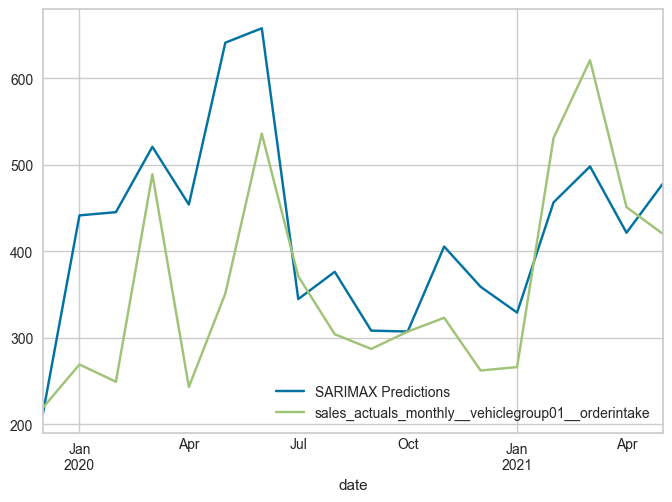

In [239]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
exog_train = train[column_names_array]
sarimax_model = SARIMAX(train['sales_actuals_monthly__vehiclegroup01__orderintake'], order=(3, 0, 1), seasonal=(3,0,1,12), exog=exog_train)

model = sarimax_model.fit()
start = len(train)
end = len(train) + len(test) - 1
exog_test = test[column_names_array]
pred = model.predict(start=start, end=end, typ='levels', exog=exog_test).rename('SARIMAX Predictions')

pred.plot(legend=True)
test['sales_actuals_monthly__vehiclegroup01__orderintake'].plot(legend=True)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

test['sales_actuals_monthly__vehiclegroup01__orderintake'].mean()
rmse = sqrt(mean_squared_error(pred, test['sales_actuals_monthly__vehiclegroup01__orderintake']))
mape = mean_absolute_percentage_error(pred, test['sales_actuals_monthly__vehiclegroup01__orderintake'])
print(mape)
print(rmse)

In [228]:
test['sales_actuals_monthly__vehiclegroup01__orderintake']

date
2019-12    219
2020-01    269
2020-02    249
2020-03    489
2020-04    243
2020-05    351
2020-06    536
2020-07    371
2020-08    304
2020-09    287
2020-10    307
2020-11    323
2020-12    262
2021-01    266
2021-02    531
2021-03    621
2021-04    451
2021-05    420
Freq: M, Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: int64

SARIMAX HYPERPARAMETER TUNING

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm
import warnings

# Define the p, d, q parameters to take any value between
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(test['sales_actuals_monthly__vehiclegroup01__orderintake'],
                                                  order=param,
                                                  seasonal_order=param_seasonal,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
            results = temp_model.fit()
            print(f"SARIMA{param}{param_seasonal} - AIC: {results.aic}")
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f"Best SARIMA model - AIC: {best_pdq}, {best_seasonal_pdq}, {best_aic}")


In [195]:
df_v3 = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df_v3 = convert_month_to_date(df_v3)
df_v3

,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
date,,,,,,,,,,,,,,,,,,,,,
2000-01,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01,Country C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01,Country D,292.0,426.0,837.0,667.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01,Country B,333.0,476.0,833.0,833.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-11,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029-12,Country B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029-12,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df_v3_B = df_v3[df_v3.countryname == "Country B"]
df_v3_B

,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
date,,,,,,,,,,,,,,,,,,,,,
2000-01,Country B,333.0,476.0,833.0,833.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02,Country B,342.0,489.0,799.0,799.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03,Country B,407.0,582.0,945.0,945.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04,Country B,332.0,474.0,946.0,946.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05,Country B,338.0,483.0,1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-08,Country B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029-09,Country B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029-10,Country B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
exclude_columns = [col for col in df_v3_B.columns if 'global' in col.lower() or 'registration' in col.lower()]

# Create a new DataFrame with only the selected columns
filtered_df_B = df_v3_B.drop(columns=exclude_columns)
filtered_df_B.fillna(filtered_df_B.mean(), inplace=True)


In [204]:
filtered_df_B = filtered_df_B.select_dtypes(include='number')
pearson_corr = filtered_df_B.corr()
pearson_corr
filtered_corr = pearson_corr[abs(pearson_corr) > 0.3]
filtered_corr

,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,sales_actuals_monthly__vehiclegroup05__orderintake,sales_actuals_monthly__vehiclegroup05__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
sales_actuals_monthly__vehiclegroup01__orderintake,1.000000,0.364422,NaN,NaN,NaN,NaN,0.321568,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup01__retail,0.364422,1.000000,0.356640,0.605002,NaN,0.302904,NaN,0.543795,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup02__orderintake,NaN,0.356640,1.000000,0.689429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup02__retail,NaN,0.605002,0.689429,1.000000,NaN,NaN,NaN,0.338989,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_actuals_monthly__vehiclegroup03__orderintake,NaN,NaN,NaN,NaN,1.0,0.331209,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
registrations__buildtype_kurzheck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.946832,0.856981,0.710956,0.383311,0.939132,1.000000,0.869505,NaN,0.803385,0.874757
registrations__buildtype_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.827085,0.766770,0.399042,0.374026,0.773344,0.869505,1.000000,NaN,0.634260,0.653026
registrations__buildtype_pickup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.450382,NaN,NaN,NaN,1.0,NaN,NaN
registrations__buildtype_coupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.834502,0.888963,0.667809,0.694356,0.830076,0.803385,0.634260,NaN,1.000000,0.783666


In [206]:
# Get the column names containing 'global' or 'registration'
filtered_columns = [col for col in df_v3.columns if 'leasing_contracts' in col.lower()]

# Create a new DataFrame with only the selected columns
filtered_df = df[filtered_columns]
array_leasing_contracts_end = filtered_df.columns.to_list()
array_leasing_contracts_end

['leasing_contracts__vehiclegroup01__end',
 'leasing_contracts__vehiclegroup01__start',
 'leasing_contracts__vehiclegroup02__end',
 'leasing_contracts__vehiclegroup02__start',
 'leasing_contracts__vehiclegroup03__end',
 'leasing_contracts__vehiclegroup03__start',
 'leasing_contracts__vehiclegroup04__end',
 'leasing_contracts__vehiclegroup04__start',
 'leasing_contracts__vehiclegroup05__end',
 'leasing_contracts__vehiclegroup05__start',
 'leasing_contracts__vehiclegroup06__end',
 'leasing_contracts__vehiclegroup06__start',
 'leasing_contracts__vehiclegroup07__end',
 'leasing_contracts__vehiclegroup07__start',
 'leasing_contracts__vehiclegroup08__end',
 'leasing_contracts__vehiclegroup08__start',
 'leasing_contracts__vehiclegroup09__end',
 'leasing_contracts__vehiclegroup09__start',
 'leasing_contracts__vehiclegroup10__end',
 'leasing_contracts__vehiclegroup10__start',
 'leasing_contracts__vehiclegroup11__end',
 'leasing_contracts__vehiclegroup11__start',
 'leasing_contracts__vehiclegrou

In [ ]:
df_v5 = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df_v5 = convert_month_to_date(df_v5)
df_v5 = df_v5[df_v5.countryname == "Country A"]
df_v5 = df_v5.asfreq('M')
#columns_to_keep = ['sales_actuals_monthly__vehiclegroup01__orderintake']
#df = df[columns_to_keep]
df_v5['Date'] = df_v5.index
df_v5 = df_v2.iloc[257:]
df_v5 = df_v2.iloc[:-85]
df_v5


SARIMAX - SARIMAX

In [587]:
from preprocessing import convert_month_to_date

df = pd.read_csv("./data/kitCapstoneJan24_data.csv", sep=";")
df = convert_month_to_date(df)
df = df[df.countryname == "Country A"]
df = df.asfreq('M')
#columns_to_keep = ['sales_actuals_monthly__vehiclegroup01__orderintake']
#df = df[columns_to_keep]
df['Date'] = df.index
df = df.iloc[:-84]
target_col = "sales_actuals_monthly__vehiclegroup01__orderintake"
# Convert the column values to integers
#df[target_col] = df[target_col].astype(int)
df = df.select_dtypes(include='number')
df.shape

(276, 2367)

In [588]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()
imp_mean.fit_transform(df).shape

(276, 2319)

In [589]:
print(df.shape)
train_df = df.iloc[:240,:]
final_df = df.iloc[:258,:]
test = df.iloc[240:258,:]
print(final_df.shape,test.shape)

(276, 2367)
(258, 2367) (18, 2367)


In [590]:
top_10_columns =  get_high_corr_cols(10)
top_10_columns

['leasing_contracts__vehiclegroup23__end',
 'leasing_contracts__vehiclegroup06__end',
 'global_economy__nominal_statistical_discrepancy_lcu__euro',
 'global_economy__nominal_statistical_discrepancy_euro__euro',
 'global_economy__nominal_statistical_discrepancy_ppp__u_s_dollar',
 'global_economy__nominal_statistical_discrepancy_us__u_s_dollar',
 'global_economy__bop_other_investment_asset_debit_capital_outflow_lcu__euro',
 'global_economy__bop_other_investment_asset_debit_capital_outflow_euro__euro',
 'global_economy__bop_other_investment_liability_credit_capital_inflow_euro__euro',
 'global_economy__bop_other_investment_liability_credit_capital_inflow_lcu__euro',
 'global_economy__bop_direct_investment_asset_debit_capital_outflow_lcu__euro',
 'global_economy__bop_direct_investment_asset_debit_capital_outflow_euro__euro',
 'global_consumer__total_population_20_to_24',
 'global_consumer__female_population_20_to_24',
 'leasing_contracts__vehiclegroup24__end',
 'global_economy__bop_portfol

In [591]:
start=len(train)
end=len(train)+len(test)-1
train = df.select_dtypes(include='number')
exog_test = test[top_10_columns]
date_range = pd.date_range(start='2000-01-01', periods=240, freq='MS')

imputer = SimpleImputer()
train_df = pd.DataFrame(train, columns=list(train.columns))
train = train.iloc[:240,:] 

In [592]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
exog_train = train[column_names_array]
exog_train = imputer.fit_transform(exog_train)

In [593]:
sarimax_model = SARIMAX(train[target_col], order=(3, 0, 1), seasonal=(3,0,1,12), exog=exog_train, mle_regression=False)
model = sarimax_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77935D+00    |proj g|=  2.40390D+00


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  5.77513D+00    |proj g|=  2.34281D+00
  ys=-1.551E-03  -gs= 7.146E-03 BFGS update SKIPPED
  ys=-1.205E-05  -gs= 4.957E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8    125      3     2     0   2.966D+00   5.775D+00
  F =   5.7751187502189261     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [594]:
start = 240
end = 258
print(start)
print(end)
exog_test = test[column_names_array]
exog_test = imputer.fit_transform(exog_test)

240
258


0.19965339742143307
106.47703256952842


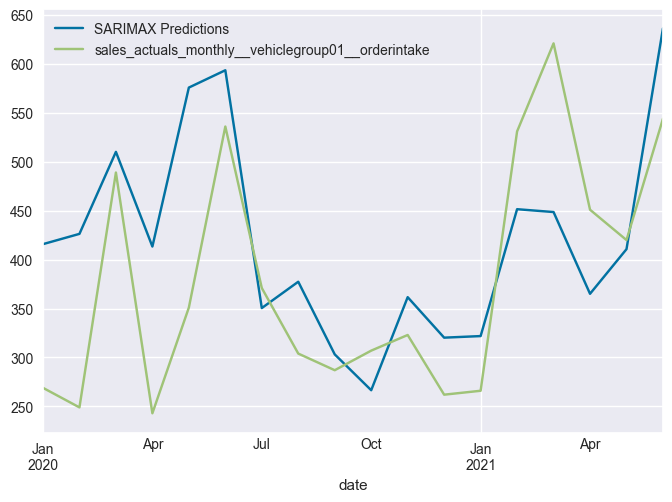

In [596]:
pred = model.predict(start=240, end=257, dynamic=True, exog=exog_test).rename('SARIMAX Predictions')

pred.plot(legend=True)
test[target_col].plot(legend=True)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

test[target_col].mean()
rmse = sqrt(mean_squared_error(pred, test[target_col]))
mape = mean_absolute_percentage_error(pred, test[target_col])
print(mape)
print(rmse)

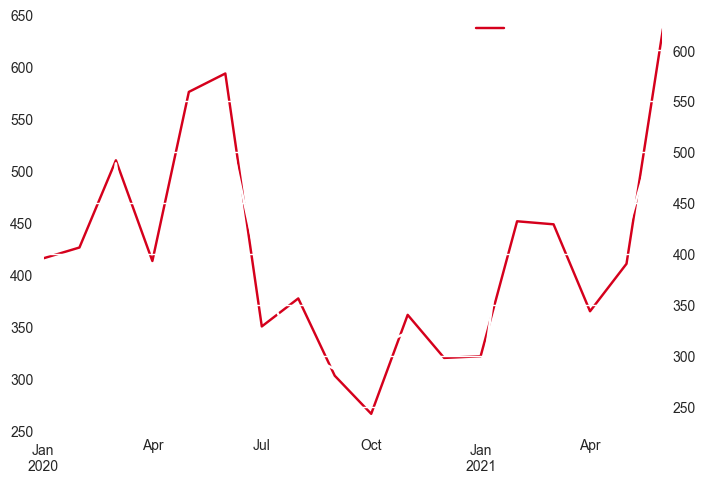

In [601]:
import matplotlib.pyplot as plt

# Set text color to white
plt.rcParams['text.color'] = 'white'

# Set background color to transparent
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'

# Create a figure and two axes
fig, ax1 = plt.subplots()

# Plot pred with color (213, 0, 28)
pred.plot(legend=True, color=(213/255, 0, 28/255), ax=ax1)

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# Plot test in white on the second axis
test[target_col].plot(legend=True, color='white', ax=ax2)

# Save the plot as a PNG file
plt.savefig('output_plot_v2.png', transparent=True)

# Show the plot (optional)
plt.show()


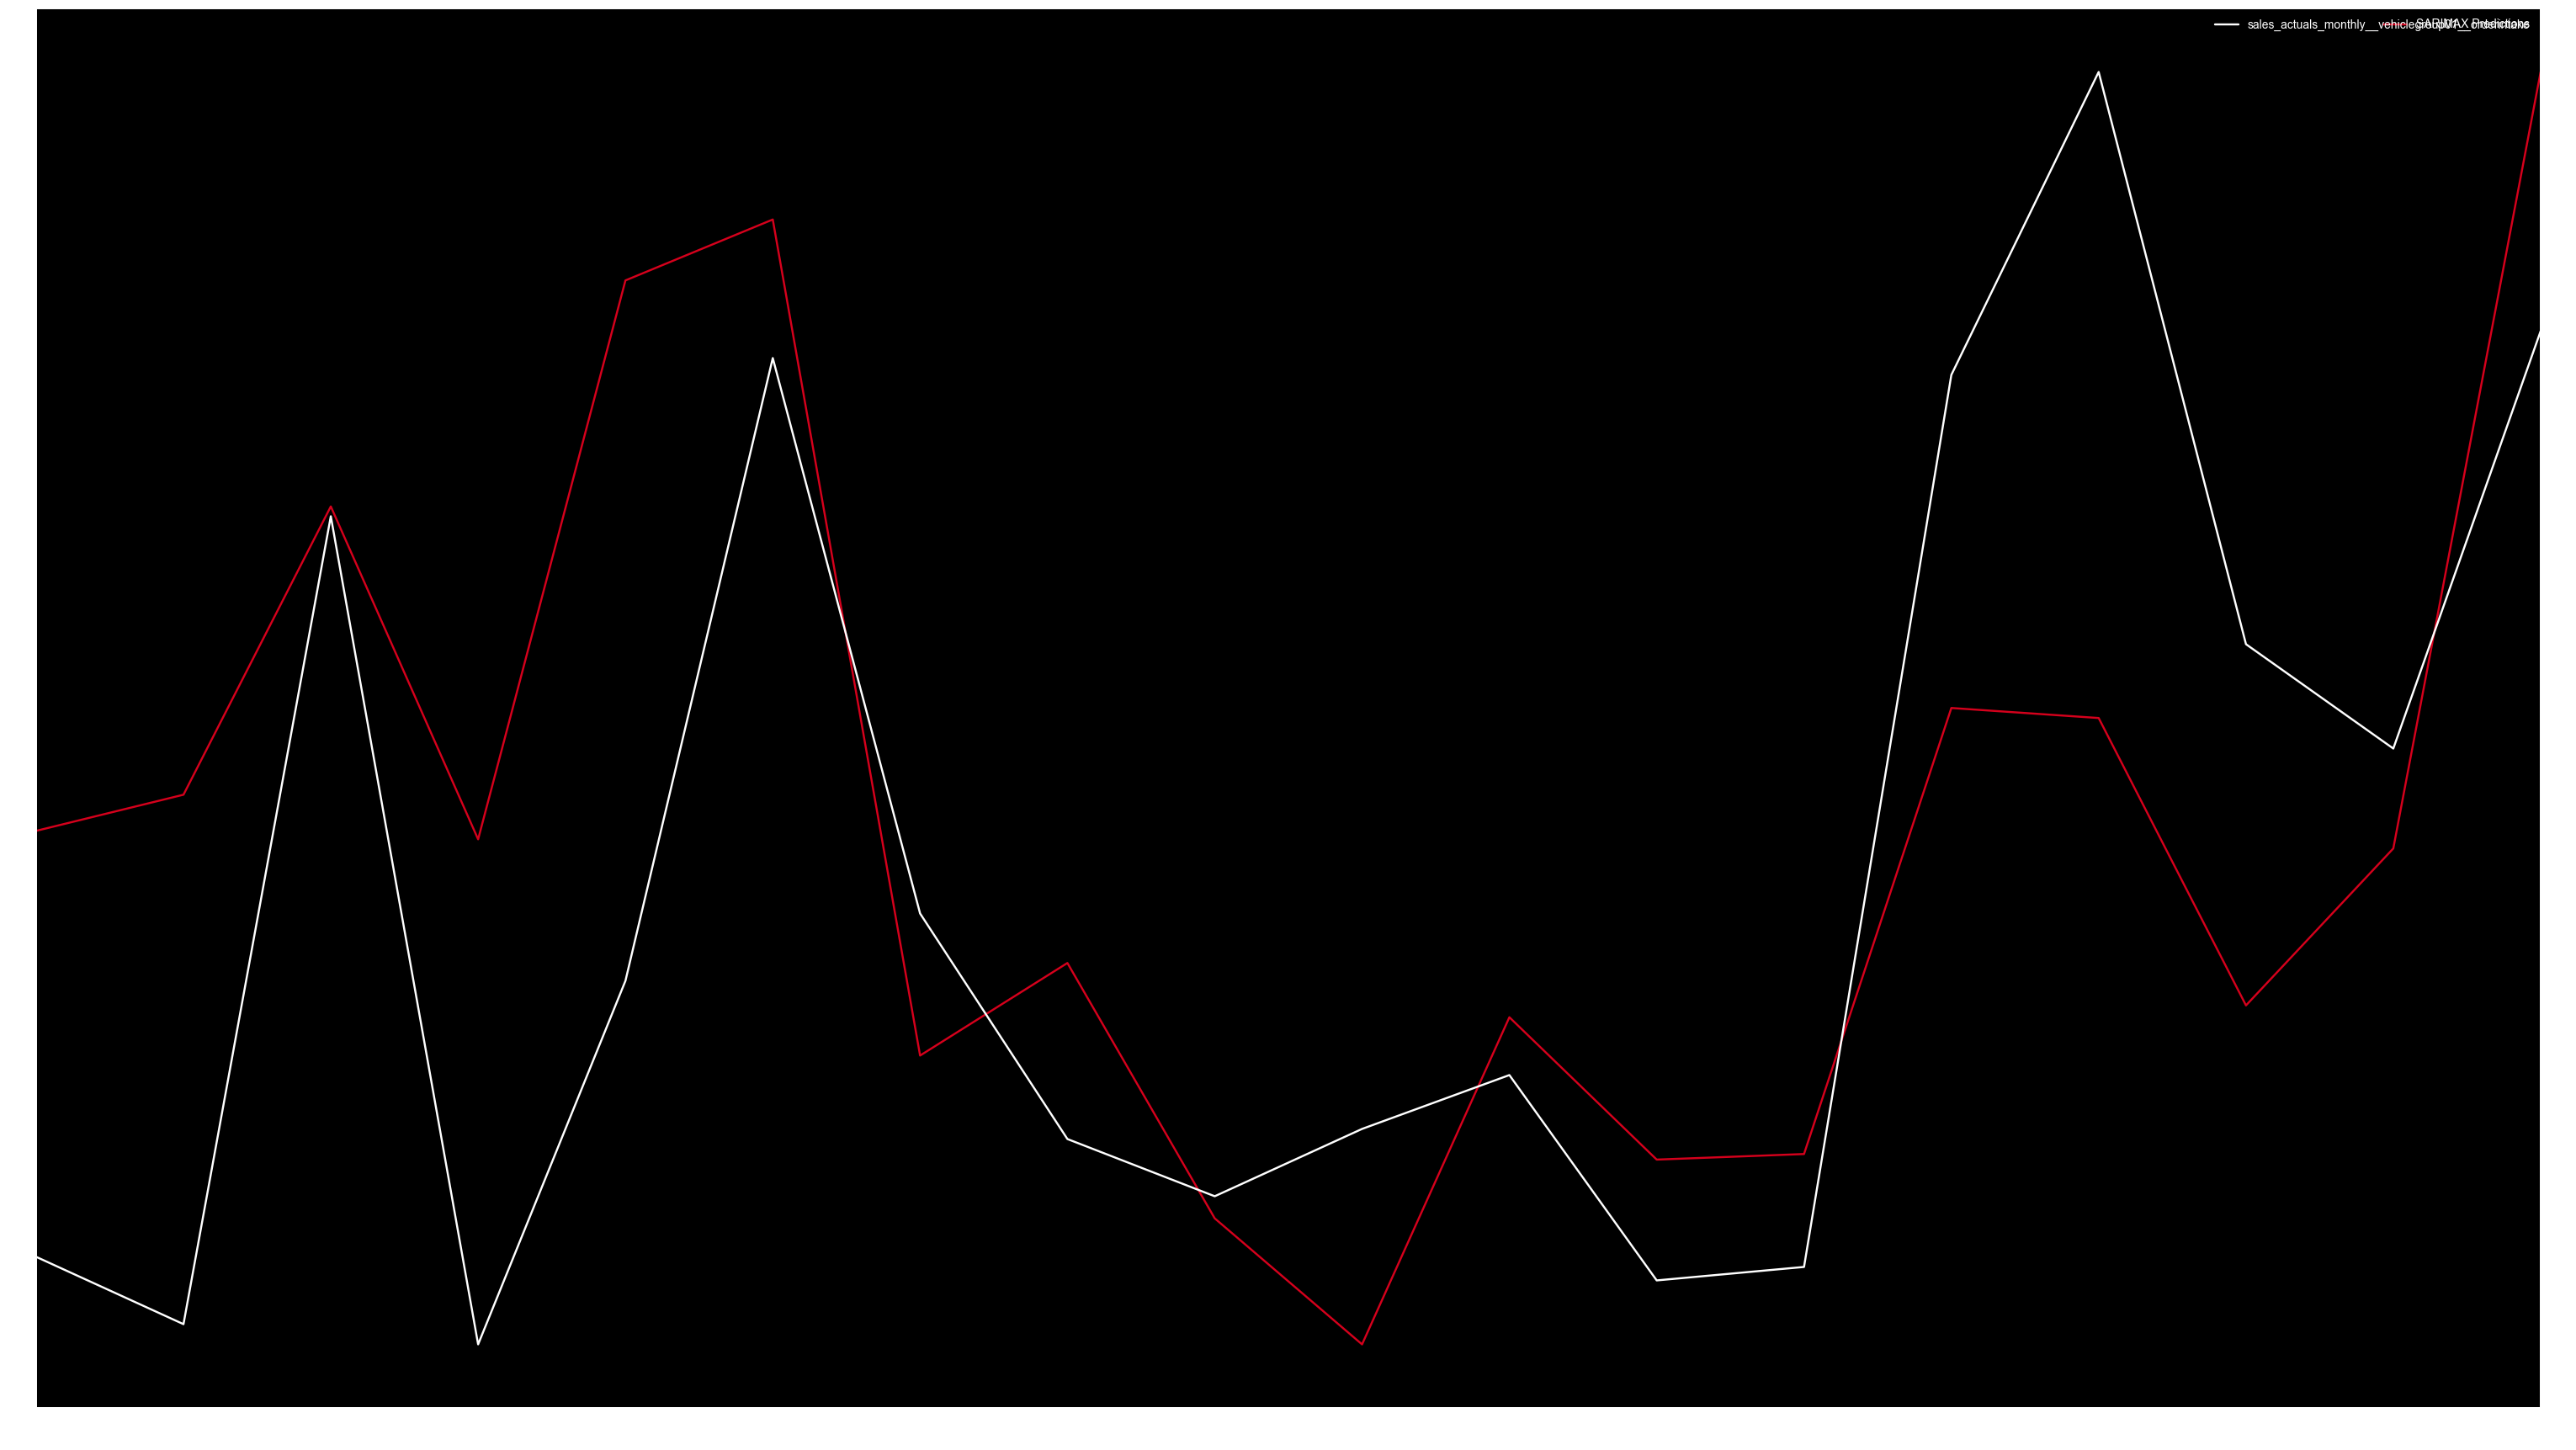

In [602]:
import matplotlib.pyplot as plt

# Set text color to white
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Set background color to black
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'

# Create a figure and two axes
fig, ax1 = plt.subplots()

# Plot pred with color (213, 0, 28)
pred.plot(legend=True, color=(213/255, 0, 28/255), ax=ax1)

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# Plot test in white on the second axis
test[target_col].plot(legend=True, color='white', ax=ax2)

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Set the resolution to 4K
fig.set_size_inches(3840/100, 2160/100)  # 4K resolution is 3840x2160 pixels

# Save the plot as a PNG file with 4K resolution
plt.savefig('output_plot_4k.png', transparent=True, dpi=100)

# Show the plot (optional)
plt.show()


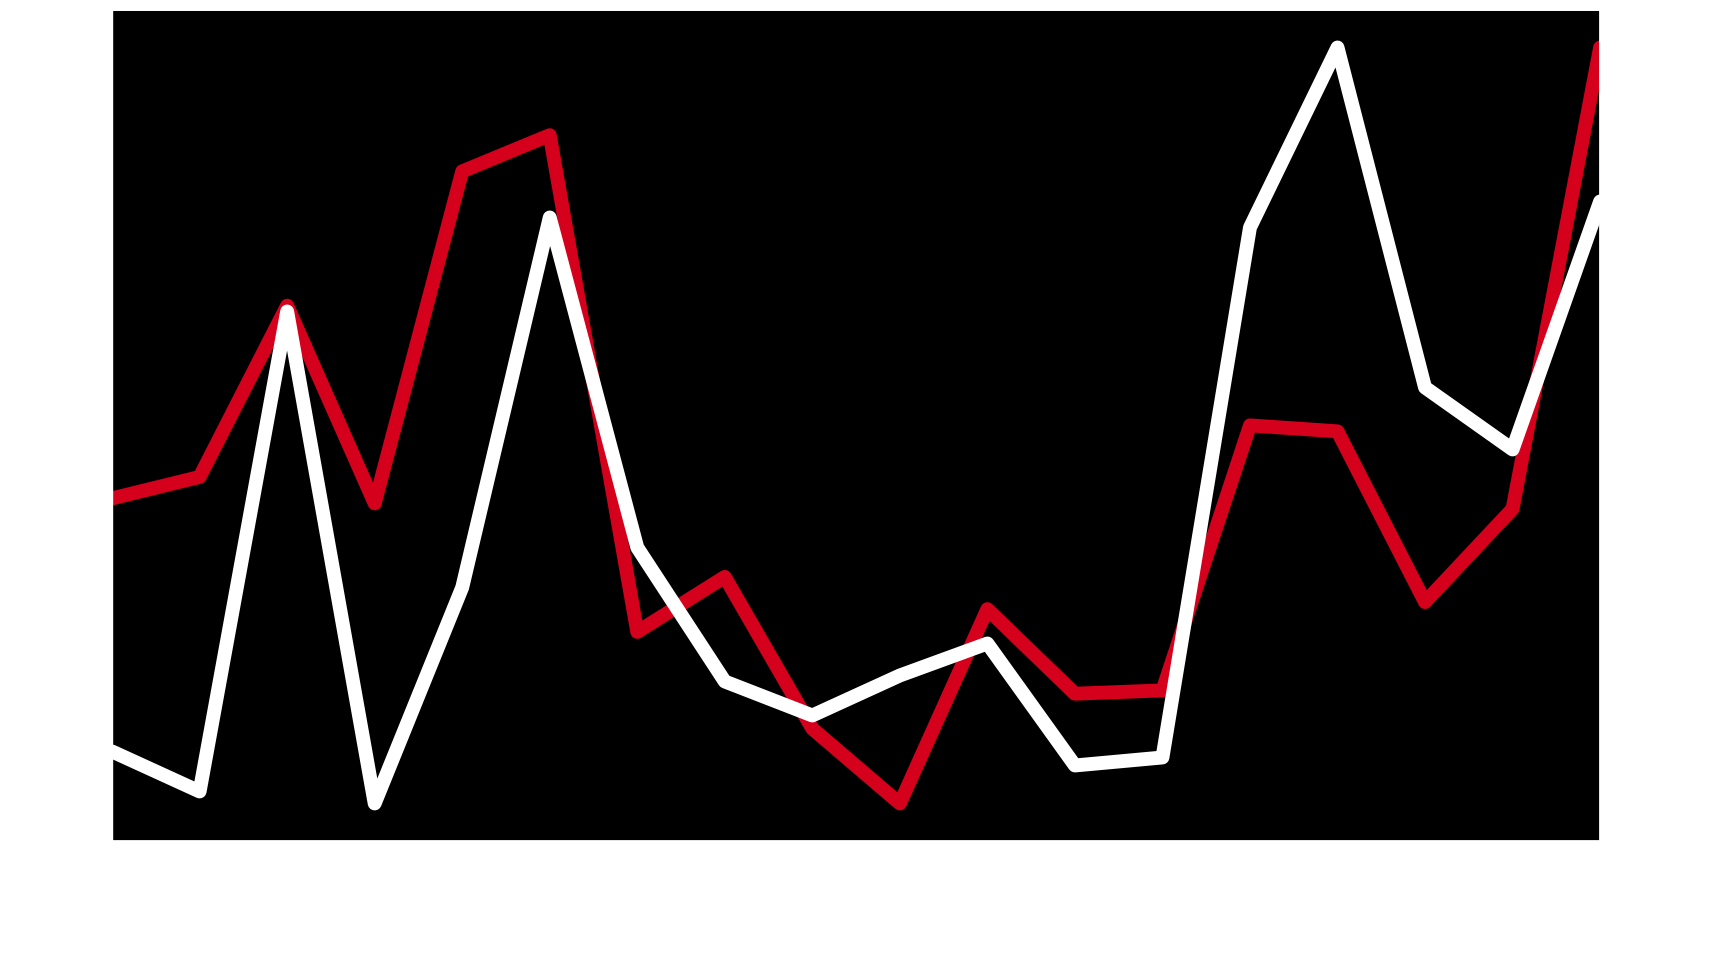

In [612]:
import matplotlib.pyplot as plt

# Set text color to white
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Set background color to black
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'

# Create a figure and two axes
fig, ax1 = plt.subplots()

# Plot pred with color (213, 0, 28), thicker line
pred.plot(legend=False, color=(213/255, 0, 28/255), linewidth=10, ax=ax1)

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# Plot test in white on the second axis, thicker line
test[target_col].plot(legend=False, color='white', linewidth=10, ax=ax2)

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Set the resolution to Full HD (1920x1080 pixels)
fig.set_size_inches(1920/100, 1080/100)

# Increase font size for axis labels and ticks
ax1.tick_params(axis='both', which='major', labelsize=40)
ax2.tick_params(axis='both', which='major', labelsize=40)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=40)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=40)
ax2.set_ylabel(ax2.get_ylabel(), fontsize=40)

# Increase line thickness for axis lines
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1)
ax2.spines['right'].set_linewidth(1)

# Save the plot as a PNG file with Full HD resolution
plt.savefig('output_plot_full_hd.png', transparent=True, dpi=100)

# Show the plot (optional)
plt.show()


In [584]:
pred

2021-07    162.152018
2021-08    188.254440
2021-09    229.827561
2021-10    326.898328
2021-11    310.264628
2021-12    379.204534
2022-01    199.359325
2022-02    397.465042
2022-03    257.906027
2022-04    590.789477
2022-05    505.515729
2022-06    554.438288
2022-07    587.537101
2022-08    495.173803
2022-09    515.263107
2022-10    387.296966
2022-11    338.958985
2022-12    352.928025
Freq: M, Name: SARIMAX Predictions, dtype: float64

In [545]:
test['sales_actuals_monthly__vehiclegroup01__orderintake']

date
2020-01    269
2020-02    249
2020-03    489
2020-04    243
2020-05    351
2020-06    536
2020-07    371
2020-08    304
2020-09    287
2020-10    307
2020-11    323
2020-12    262
2021-01    266
2021-02    531
2021-03    621
2021-04    451
2021-05    420
2021-06    544
Freq: M, Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: int64